In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation, LeakyReLU
from keras import backend
from keras.callbacks import TensorBoard
from keras.optimizers import Adam
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Hyperparams
n_units = 400
layers = 4
n_batch = 1024
n_epochs = 10

In [4]:
df = pd.read_csv('call_options_spy.csv')
df = df.dropna(axis=0)
call_df = df

In [28]:
scaler = MinMaxScaler()

# Fit and transform the data
call_df = pd.DataFrame(scaler.fit_transform(call_df), columns=call_df.columns)

In [29]:
call_X_train, call_X_test, call_y_train, call_y_test = train_test_split(call_df.drop(['BID_CALL', 'ASK_CALL'], axis=1),
                                                                        call_df[['BID_CALL', 'ASK_CALL']],
                                                                        test_size=0.01, random_state=42)
# put_X_train, put_X_test, put_y_train, put_y_test = train_test_split(put_df.drop(['best_bid', 'best_offer'], axis=1),
#                                                                     put_df[['best_bid', 'best_offer']],
#                                                                     test_size=0.01, random_state=42)

In [33]:
model = Sequential()
model.add(Dense(n_units, input_dim=call_X_train.shape[1]))
model.add(LeakyReLU())

for _ in range(layers - 1):
    model.add(Dense(n_units))
    model.add(LeakyReLU())

model.add(Dense(2, activation='relu'))

model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001))

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 400)               6000      
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 400)               0         
                                                                 
 dense_6 (Dense)             (None, 400)               160400    
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 400)               0         
                                                                 
 dense_7 (Dense)             (None, 400)               160400    
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 400)               0         
                                                                 
 dense_8 (Dense)             (None, 400)              

In [35]:
history = model.fit(call_X_train, call_y_train, 
                    batch_size=n_batch, epochs=10, 
                    validation_split = 0.01,
                    callbacks=[TensorBoard()],
                    verbose=1)

Epoch 1/10
765/765 [==============================] - 13s 16ms/step - loss: 9.6397e-04 - val_loss: 1.0131e-05
Epoch 2/10
765/765 [==============================] - 14s 18ms/step - loss: 7.3961e-06 - val_loss: 7.4658e-06
Epoch 3/10
765/765 [==============================] - 13s 17ms/step - loss: 6.3758e-06 - val_loss: 4.4830e-06
Epoch 4/10
765/765 [==============================] - 13s 18ms/step - loss: 5.5448e-06 - val_loss: 2.6795e-06
Epoch 5/10
765/765 [==============================] - 13s 18ms/step - loss: 4.8163e-06 - val_loss: 3.0644e-06
Epoch 6/10
765/765 [==============================] - 13s 18ms/step - loss: 4.5912e-06 - val_loss: 5.5261e-06
Epoch 7/10
765/765 [==============================] - 13s 18ms/step - loss: 4.3499e-06 - val_loss: 2.7503e-06
Epoch 8/10
765/765 [==============================] - 14s 18ms/step - loss: 4.0090e-06 - val_loss: 2.0969e-06
Epoch 9/10
765/765 [==============================] - 14s 19ms/step - loss: 3.8341e-06 - val_loss: 1.9398e-06
Epoch 10/1

In [36]:
# Make predictions on the training or test dataset
predictions = model.predict(call_X_train)


24719/24719 [==============================] - 48s 2ms/step


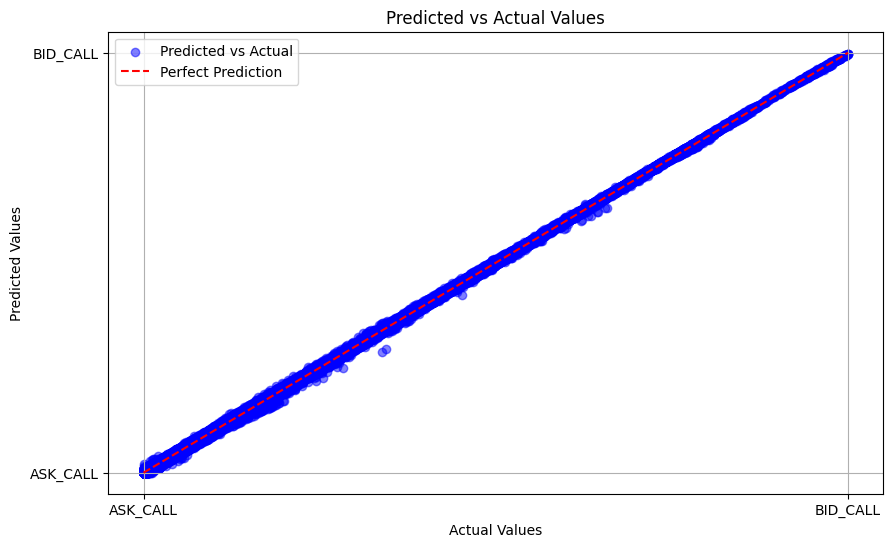

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data for demonstration (replace with your actual data)
# Actual values
# y_real = scaler.inverse_transform(call_y)
actual_values = call_y_train  # Your actual values

# Predictions made by the model
# predictions = model.predict(call_X_train)  # Ensure call_X_train is your input data

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(actual_values, predictions, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.grid()
plt.show()
